In [34]:
# load relevant packages, set some display parameters

%reset -f

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold
from math import sqrt
from scipy import stats
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, learning_curve
# import ifsg
import glob, os #I ADDED
from sklearn.svm import SVR, LinearSVR #I ADDED
from sklearn.tree import DecisionTreeRegressor #I ADDED
import pickle
import re
import random
import os
import json
import warnings
import seaborn as sns
import gc
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

#ifsg.__version__

In [6]:
# x=os.path.splitext(os.path.split(os.path.splitext(os.path.split(os.getcwd())[0])[0])[0])
# path_dataset=str(x[0])+os.sep+"Data"+os.sep+ "Datasets"

# print(path_dataset)
#file= 'W:\\Work\\Assense\\ML\\japan_sjt_df_07_03_19.json'

In [36]:
df = df.dropna(axis=1,how = 'all')

In [35]:
#file = path_dataset+os.sep+"sjt"+os.sep+"SJT1_Heb_Jan19.json"
file = 'W:\\Work\\Assense\\ML\\DataFrames\\japan_jan_sjt_df.json'
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_train)
print(df.shape)
#df.head()

(115, 91)


In [44]:
sol=[]
for col in list(df.columns):
    if re.search('sjt.*SJTRoundUserAnswers\_.*', col):
        sol.append(col)
df1= df[sol]
df1.head()

,sjt.SJTRoundUserAnswers_teamwork_heb,sjt.SJTRoundUserAnswers_teamwork_jap,sjt.SJTRoundUserAnswers_eq_jap,sjt.SJTRoundUserAnswers_consienciousness_heb,sjt.SJTRoundUserAnswers_empathy_heb,sjt.SJTRoundUserAnswers_consienciousness_jap,sjt.SJTRoundUserAnswers_eq_heb,sjt.SJTRoundUserAnswers_knowledge_of_norms_heb,sjt.SJTRoundUserAnswers_collegial_behavior_jap,sjt.SJTRoundUserAnswers_knowledge_of_norms_jap,sjt.SJTRoundUserAnswers_empathy_jap,sjt.SJTRoundUserAnswers_collegial_behavior_heb
5C34B4463DDA6707662C0BE9,NaN,NaN,3.875,4.863636,1.833333,4.541667,4.125,3.241379,4.4375,4.648649,1.833333,4.928571
5C3554E43DDA6707662C0BEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5C36FEEBB5997B32B4CEAA9C,NaN,NaN,4.500,4.409091,2.875000,3.916667,4.875,4.275862,4.4375,4.648649,2.458333,4.928571
5C370638B5997B32B4CEAA9D,NaN,NaN,3.625,3.500000,3.291667,4.125000,3.500,3.758621,4.4375,4.918919,3.291667,4.928571
5C3706BFB5997B32B4CEAA9E,NaN,NaN,3.875,2.590909,3.291667,2.875000,3.375,2.896552,4.4375,4.378378,2.666667,4.928571


In [48]:
df1 = df1.dropna(axis=1,how = 'all')
df1.head()

,sjt.SJTRoundUserAnswers_teamwork_heb,sjt.SJTRoundUserAnswers_teamwork_jap,sjt.SJTRoundUserAnswers_eq_jap,sjt.SJTRoundUserAnswers_consienciousness_heb,sjt.SJTRoundUserAnswers_empathy_heb,sjt.SJTRoundUserAnswers_consienciousness_jap,sjt.SJTRoundUserAnswers_eq_heb,sjt.SJTRoundUserAnswers_knowledge_of_norms_heb,sjt.SJTRoundUserAnswers_collegial_behavior_jap,sjt.SJTRoundUserAnswers_knowledge_of_norms_jap,sjt.SJTRoundUserAnswers_empathy_jap,sjt.SJTRoundUserAnswers_collegial_behavior_heb
5C34B4463DDA6707662C0BE9,NaN,NaN,3.875,4.863636,1.833333,4.541667,4.125,3.241379,4.4375,4.648649,1.833333,4.928571
5C3554E43DDA6707662C0BEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5C36FEEBB5997B32B4CEAA9C,NaN,NaN,4.500,4.409091,2.875000,3.916667,4.875,4.275862,4.4375,4.648649,2.458333,4.928571
5C370638B5997B32B4CEAA9D,NaN,NaN,3.625,3.500000,3.291667,4.125000,3.500,3.758621,4.4375,4.918919,3.291667,4.928571
5C3706BFB5997B32B4CEAA9E,NaN,NaN,3.875,2.590909,3.291667,2.875000,3.375,2.896552,4.4375,4.378378,2.666667,4.928571


In [52]:
# sort columns in alphabetical order

a = [];
for col in sorted(df1.columns):
    a.append(col)
    
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

a.sort(key=natural_keys)

df1=df1[a]

#df=df[np.logical_not(df.index.str.startswith('W'))]
df1.head()

,sjt.SJTRoundUserAnswers_collegial_behavior_heb,sjt.SJTRoundUserAnswers_collegial_behavior_jap,sjt.SJTRoundUserAnswers_consienciousness_heb,sjt.SJTRoundUserAnswers_consienciousness_jap,sjt.SJTRoundUserAnswers_empathy_heb,sjt.SJTRoundUserAnswers_empathy_jap,sjt.SJTRoundUserAnswers_eq_heb,sjt.SJTRoundUserAnswers_eq_jap,sjt.SJTRoundUserAnswers_knowledge_of_norms_heb,sjt.SJTRoundUserAnswers_knowledge_of_norms_jap,sjt.SJTRoundUserAnswers_teamwork_heb,sjt.SJTRoundUserAnswers_teamwork_jap
5C34B4463DDA6707662C0BE9,4.928571,4.4375,4.863636,4.541667,1.833333,1.833333,4.125,3.875,3.241379,4.648649,NaN,NaN
5C3554E43DDA6707662C0BEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5C36FEEBB5997B32B4CEAA9C,4.928571,4.4375,4.409091,3.916667,2.875000,2.458333,4.875,4.500,4.275862,4.648649,NaN,NaN
5C370638B5997B32B4CEAA9D,4.928571,4.4375,3.500000,4.125000,3.291667,3.291667,3.500,3.625,3.758621,4.918919,NaN,NaN
5C3706BFB5997B32B4CEAA9E,4.928571,4.4375,2.590909,2.875000,3.291667,2.666667,3.375,3.875,2.896552,4.378378,NaN,NaN


In [63]:

df1.to_excel("sjt_user_ans.xlsx")

In [ ]:
sjt_n = ''
for j,col in enumerate(df.columns[df.columns.str.startswith('sjt'+sjt_n+'.SJTRoundUserAnswers.')]):
    n=str.split(col,'sjt'+sjt_n+'.SJTRoundUserAnswers.')[1]
    print('\n\n\n',j+1,':',df['sjt'+sjt_n+'.SJTRoundUserQuestions.'+n][0])
    df1['SJTRoundUserAnswers'+'_num.'+n] = pd.Series(np.zeros(df.shape[0]), index=df.index)
    for i,ans in enumerate(sorted(set(df['sjt'+sjt_n+'.SJTRoundUserAnswersString.'+n]))): # sorted
        if ans is None:
             continue
        if bool(re.match('^[0-9\.\-]+$',ans.strip())):
             continue                   
        df['SJTRoundUserAnswers'+'_num.'+n][df[col]==ans]=i+1
        if re.match('^[a-zA-Z,\._\- 0-9]*$',ans) is not None:
            print(i+1,'-',ans)
        else:
            print(i+1,'-',ans[::-1])
        print(round(len(df[col][df[col]==ans])/len(df[col])*100,1),'%\n')
    if bool(re.match('^[0-9\.\-]+$',ans.strip())):
        pd.to_numeric(df['sjt'+sjt_n+'.SJTRoundUserAnswersString.'+n]).hist()    
    else:
        df['SJTRoundUserAnswers'+'_num.'+n].hist()
    plt.show()

In [11]:
# sort columns in alphabetical order

a = [];
for col in sorted(df.columns):
    a.append(col)
    
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

a.sort(key=natural_keys)

df=df[a]

#df=df[np.logical_not(df.index.str.startswith('W'))]
df.head()

,pzl.site_name.0,pzl.stress.0,pzl.stress.1,pzl.stress.2,pzl.stress.3,sjt.C#.Collegial Behavior,sjt.C#.Conscientiousness,sjt.C#.EQ,sjt.C#.Empathy,sjt.C#.Knowledge Of Social Organizational Norms,sjt.SJTRoundUserAnswers.0,sjt.SJTRoundUserAnswers.1,sjt.SJTRoundUserAnswers.2,sjt.SJTRoundUserAnswers.3,sjt.SJTRoundUserAnswers.4,sjt.SJTRoundUserAnswers.5,sjt.SJTRoundUserAnswers.6,sjt.SJTRoundUserAnswers.7,sjt.SJTRoundUserAnswers.8,sjt.SJTRoundUserAnswers.9,sjt.SJTRoundUserAnswers.10,sjt.SJTRoundUserAnswers.11,sjt.SJTRoundUserAnswers.12,sjt.SJTRoundUserAnswers.13,sjt.SJTRoundUserAnswers.14,sjt.SJTRoundUserAnswers.15,sjt.SJTRoundUserAnswers.16,sjt.SJTRoundUserAnswers.17,sjt.SJTRoundUserAnswers.18,sjt.SJTRoundUserAnswers.19,sjt.SJTRoundUserAnswers.20,sjt.SJTRoundUserAnswers.21,sjt.SJTRoundUserAnswers.22,sjt.SJTRoundUserAnswersString.0,sjt.SJTRoundUserAnswersString.1,sjt.SJTRoundUserAnswersString.2,sjt.SJTRoundUserAnswersString.3,sjt.SJTRoundUserAnswersString.4,sjt.SJTRoundUserAnswersString.5,sjt.SJTRoundUserAnswersString.6,sjt.SJTRoundUserAnswersString.7,sjt.SJTRoundUserAnswersString.8,sjt.SJTRoundUserAnswersString.9,sjt.SJTRoundUserAnswersString.10,sjt.SJTRoundUserAnswersString.11,sjt.SJTRoundUserAnswersString.12,sjt.SJTRoundUserAnswersString.13,sjt.SJTRoundUserAnswersString.14,sjt.SJTRoundUserAnswersString.15,sjt.SJTRoundUserAnswersString.16,sjt.SJTRoundUserAnswersString.17,sjt.SJTRoundUserAnswersString.18,sjt.SJTRoundUserAnswersString.19,sjt.SJTRoundUserAnswersString.20,sjt.SJTRoundUserAnswersString.21,sjt.SJTRoundUserAnswersString.22,sjt.SJTRoundUserAnswers_collegial_behavior_heb,sjt.SJTRoundUserAnswers_collegial_behavior_jap,sjt.SJTRoundUserAnswers_consienciousness_heb,sjt.SJTRoundUserAnswers_consienciousness_jap,sjt.SJTRoundUserAnswers_empathy_heb,sjt.SJTRoundUserAnswers_empathy_jap,sjt.SJTRoundUserAnswers_eq_heb,sjt.SJTRoundUserAnswers_eq_jap,sjt.SJTRoundUserAnswers_knowledge_of_norms_heb,sjt.SJTRoundUserAnswers_knowledge_of_norms_jap,sjt.SJTRoundUserAnswers_teamwork_heb,sjt.SJTRoundUserAnswers_teamwork_jap,sjt.SJTRoundUserQuestions.0,sjt.SJTRoundUserQuestions.1,sjt.SJTRoundUserQuestions.2,sjt.SJTRoundUserQuestions.3,sjt.SJTRoundUserQuestions.4,sjt.SJTRoundUserQuestions.5,sjt.SJTRoundUserQuestions.6,sjt.SJTRoundUserQuestions.7,sjt.SJTRoundUserQuestions.8,sjt.SJTRoundUserQuestions.9,sjt.SJTRoundUserQuestions.10,sjt.SJTRoundUserQuestions.11,sjt.SJTRoundUserQuestions.12,sjt.SJTRoundUserQuestions.13,sjt.SJTRoundUserQuestions.14,sjt.SJTRoundUserQuestions.15,sjt.SJTRoundUserQuestions.16,sjt.SJTRoundUserQuestions.17,sjt.SJTRoundUserQuestions.18,sjt.SJTRoundUserQuestions.19,sjt.SJTRoundUserQuestions.20,sjt.SJTRoundUserQuestions.21,sjt.SJTRoundUserQuestions.22
5C34B4463DDA6707662C0BE9,None,None,None,None,None,4.4375,4.541667,4.50,1.833333,4.43750,2.0,2.0,3.0,1.0,1.0,1.0,3.0,4.7,1.0,1.0,2.0,2.7,3.0,1.0,4.0,3.0,1.0,4.0,2.0,2.0,NaN,NaN,NaN,Image_Dog,稲山聡を介入して問題の解決を考えてもらう。,こんなことは自分にはありえないと失望する。,傲慢,真面目,給料が下がり家族に迷惑をかけること\nになるだろうが責任を取る。,それは起こるべきではなかったが、人\n間のやることには間違いは常に存在すると思う。,4.7,このような期待は非常に不合理そして\n不公平で矢沢亜美を難しい立場に置くと思う。,友達関係の同僚。,失望を感じる。海老原たかるのミスをから\nもっと早くにチェックするべきだったと思う。,2.7,山田隆の側も理解するが、結局のところ、\nそのようなことを聞くこと自体、部下のやる気を\n損...,自分の立場を犠牲にしてでも彼女が早く\n出れるように上司に説得する。,ひそかに競争しあう関係。,稲山聡は山田隆を完璧ではないがいい\n上司だと思う。,上司は稲谷佐知さんのような社員に、\n自身の領域の中で正当な自由を与える\nべきだと思う。,クライアントは気に入らないだろう\nが、完璧なプレゼンテーションを作る\nために会議を延期す...,各社員が自身の成功と失敗の責任を\n取るべきなので海老原たかるの責任だと思う。,かなり厳しい状況、社員の欠点と能力を\nもっと認識し監督するべきだと思う。,None,None,None,4.928571,4.4375,4.863636,4.541667,1.833333,1.833333,4.125,3.875,3.241379,4.648649,NaN,NaN,あなたが一番好きな動物は何ですか？,あなたが矢沢亜美だったらどう対応しますか？,あなたが矢沢亜美だったら海老原た\n かるのことをどう思いますか？,これまでのあなたの印象では稲山聡\n はどういう性格の持ち主ですか？,これまでのあなたの印象では上司とし\n て山田隆はどういう性格の持ち主ですか？,あなたが海老原たかるだったらどう対応しますか？,この状況で発生したミスについてあな\n たはどう思いますか？,1から6のスケールの中で海老原たかる\n の矢沢亜美への要求をあなたはどう評価しますか？,矢沢亜美が海老原たかるをフォローしてくれる\n という海老原の期待をあなたはど...,海老原たかると矢沢亜美の関係を\n あなたはどう描写しますか？,矢沢亜美についてどう思いますか？,1から6のスケールの中で山田隆の矢沢\n 亜美へのリクエストをどう評価しますか？,山田隆が姉の結婚式より仕事を優先し\n てほしいと矢沢亜美に要求する状況を...,稲山聡は矢沢亜美のチームリーダーです。もしあなた\n が彼の立場だったら矢沢亜美が...,山田隆と稲山聡の関係をあなたは




 1 :  あなたが一番好きな動物は何ですか？
1 - Image_Cat
26.1 %

2 - Image_Dog
60.9 %

3 - Image_Dont like animals
1.7 %

4 - Image_Horse
7.8 %

5 - User has not answer this question
1.7 %

6 - null
1.7 %



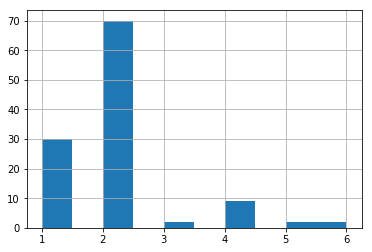




 2 :  あなたが矢沢亜美だったらどう対応しますか？
1 - null
1.7 %

2 - 。るす求要うよるす慮考を策決解う違え伝とる
あで平公不が求要の彼にるかた原榎
2.6 %

3 - 。る取を任責で分自てしーロォフをるかた原榎
6.1 %

4 - 。るす求要うよるす慮考を策決解う違え伝とる
あで平公不が求要の彼にるかた原老海
0.9 %

5 - 。うらもてし解理とだ任責のちた分自、し罪
謝に聡山稲にもととるかた原榎に聡山稲
31.3 %

6 - 。うらもてえ考を決解の題問てし入介を聡山稲
57.4 %



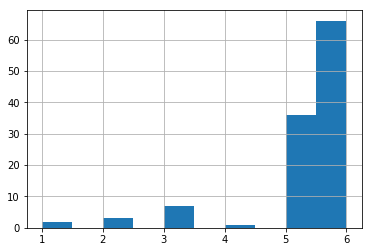




 3 :    あなたが矢沢亜美だったら海老原た
   かるのことをどう思いますか？
1 - null
1.7 %

2 - 。るす望失といなえりあはに分自はとこなんこ
4.3 %

3 - 。るじ感を任責少多に分自たっかなり足がクッェチ
19.1 %

4 - 。るす力努とうよけ助し情同に彼
10.4 %

5 - 。るじ感を任責少多に分自たっかなり足
がクッェチ情同にりぶ事仕いどひの彼
57.4 %

6 - 。るじ感をり怒にスミのし返り繰の彼
7.0 %



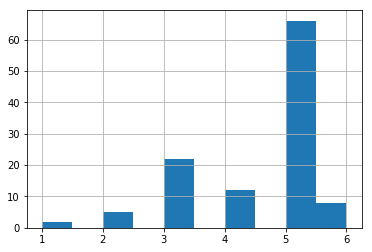




 4 :    これまでのあなたの印象では稲山聡
　はどういう性格の持ち主ですか？
1 - null
1.7 %

2 - スバーナ
38.3 %

3 - 情人
4.3 %

4 - 慢傲
47.0 %

5 - 的情感
8.7 %



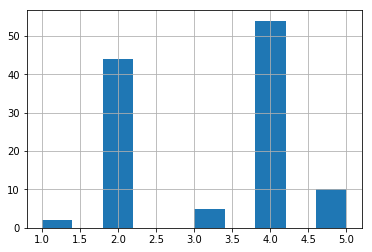




 5 :    これまでのあなたの印象では上司とし
   て山田隆はどういう性格の持ち主ですか？
1 - User has not answer this question
0.9 %

2 - null
1.7 %

3 - るきで頼信
21.7 %

4 - 格厳
25.2 %

5 - 腰嘩喧
1.7 %

6 - 目面真
48.7 %



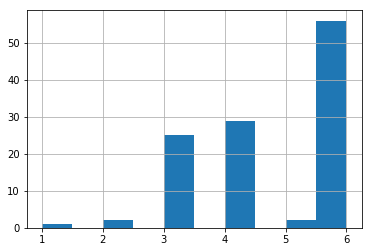




 6 :     あなたが海老原たかるだったらどう対応しますか？
1 - User has not answer this question
0.9 %

2 - null
1.7 %

3 - 。む頼うよるえらもてけ助てめ集をムー
チのり残、え伝といたけ続を事仕でま
るれさ正修に全完がい違間、に聡山稲
16.5 %

4 - 。るす求要うよるす期延を議会で
まる出がターデいし正、り謝に聡山稲
19.1 %

5 - 。む頼うよるえらもてけ助てめ集をムー
チのり残、え伝といたけ続を事仕でま
るれさ正修に全完がい違間、に聡谷稲
59.1 %

6 - 。る取を任責がうろだるなに
とこるけかを惑迷に族家りが下が料給
2.6 %



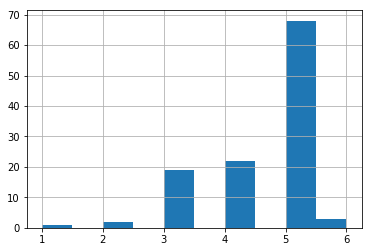




 7 :     この状況で発生したミスについてあな
    たはどう思いますか？
1 - null
1.7 %

2 - 。う思とだ要重がとこるすクッェチを事仕
に常、にめたるけ避をスミなうよのこ
39.1 %

3 - 。う思とだのもたれま生らか陥欠の制体
援支と談相のムーチはスミのこ
41.7 %

4 - 。う思とるす在存に常はい違間はにとこるやの間
人、がたっかなはできべるこ起はれそ
11.3 %

5 - 。う思とだ司上は者任責、れ
ら見くき大が陥欠の業作認確のムーチ
6.1 %



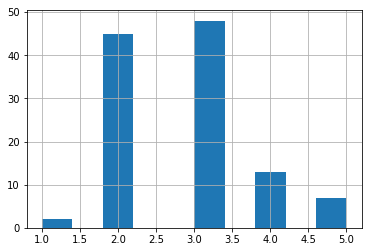




 8 :  1から6のスケールの中で海老原たかる
 の矢沢亜美への要求をあなたはどう評価しますか？
23 - null
1.7 %



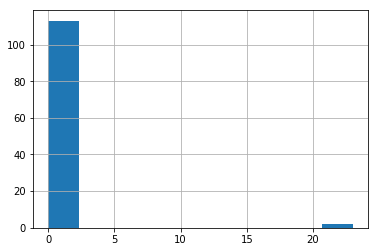




 9 :     矢沢亜美が海老原たかるをフォローしてくれる
    という海老原の期待をあなたはどう思いますか？
1 - null
1.7 %

2 - 。う思とく置に場立いし難を美亜沢矢で平公不
てしそ理合不に常非は待期なうよのこ
11.3 %

3 - 。う思と当妥でのう思とだ
きべう合け助にい互おはーバンメムーチ
37.4 %

4 - 。う思とだきべるす力努うよいなさ犯を
スミでいなら頼に人他はるかた原榎
45.2 %

5 - 。う思とたきべつ待をのるすー
ァフオをけ助が美亜沢矢
0.9 %

6 - 。う思とたきべつ待をのるす
ーァフオをけ助が美亜沢矢
3.5 %



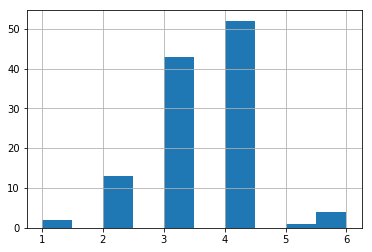




 10 :     海老原たかると矢沢亜美の関係を
    あなたはどう描写しますか？
1 - null
1.7 %

2 - 。僚同の係関達友
1.7 %

3 - 。いなはでき好をるかた原榎は美亜沢矢
33.9 %

4 - 。僚同るあに係関たし張緊
61.7 %

5 - 。人友いし親
0.9 %



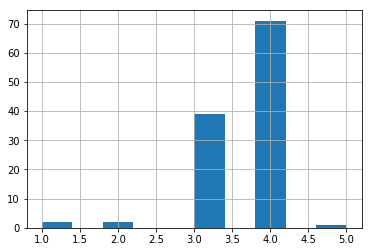




 11 :      矢沢亜美についてどう思いますか？
1 - null
1.7 %

2 - 。う思とたっだきべるすクッェチにく早とっも
らかをスミのるかた原榎。るじ感を望失
32.2 %

3 - 。う思とたっだきべるすクッェチにく早とっも
らかをスミのるかた原老海。るじ感を望失
0.9 %

4 - 。う思とだきべるあく強とっもずれさ右左に情感
26.1 %

5 - 。う思とるけつ見
を策決解な切適らかだ員社の富豊験経
22.6 %

6 - 。う思にうそいわかてれかおに況状いし厳に常非
16.5 %



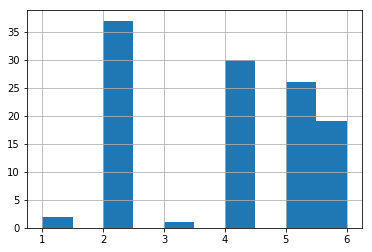




 12 :    1から6のスケールの中で山田隆の矢沢
   亜美へのリクエストをどう評価しますか？
29 - null
2.6 %



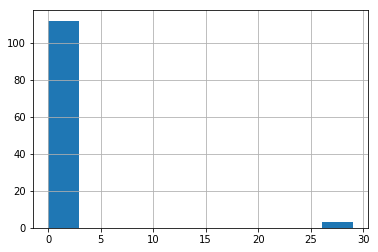




 13 :      山田隆が姉の結婚式より仕事を優先し
     てほしいと矢沢亜美に要求する状況を
     あなたはどう思いますか？
1 - null
2.6 %

2 - 。う思といならなはてし
定予をンョシーテンゼレプな要重に日
じ同るあがし催な事大のトーベイラプ
7.0 %

3 - 。う思といならなはてせら陥に
マンレジな難困なうよのこを員社、し
とうよし決解を題問のこ、てしと司上
61.7 %

4 - 。るれらみが映反の敗失の側者営経るね損
を気るやの下部、体自とこく聞をとこなうよのそ
、ろことの局結、がるす解理も側の隆田山
24.3 %

5 - 。う思とだ求要な尽不理に常非
4.3 %



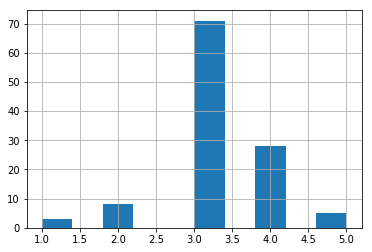




 14 :    稲山聡は矢沢亜美のチームリーダーです。もしあなた
   が彼の立場だったら矢沢亜美が姉の結婚式を欠席する
   ことを上司から要求される事態にどう対応しますか？
1 - null
2.6 %

2 - 
。るす待期を加参の女彼、りあで要重に常非は
力努の員全ムーチ、はで態事の急緊なうよのこ
6.1 %

3 - 。いなはでとこるめ決が私はに的終最、が
るす解理をとこいなはでいせの女彼が況状のこ
3.5 %

4 - 。う伝手てしく尽を力全にうよう合に間に式婚結
64.3 %

5 - 。るす得説に司上にうよるれ出
く早が女彼もでてしに牲犠を場立の分自
23.5 %



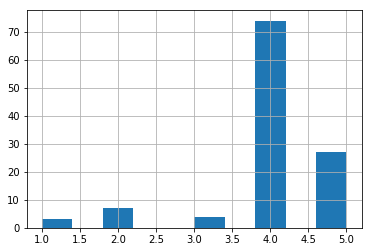




 15 :     山田隆と稲山聡の関係をあなたはどう描写しますか？
1 - null
2.6 %

2 - 。係関うあし争競にかそひ
21.7 %

3 - 。人友るすを事仕に緒一
1.7 %

4 - 。係関の上事仕るあの感張緊
51.3 %

5 - 。係関うあしーバカをい互お、がるす争論に繁頻
22.6 %



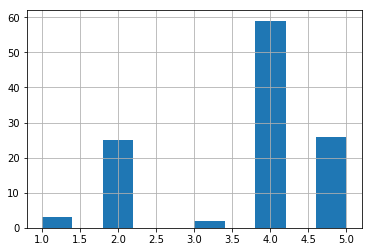




 16 :      稲山聡が山田隆に対して思っているこ
     とをあなたはどう思いますか？
1 - null
2.6 %

2 - 。う思とだ僚同い
いるせ話にクンラフを隆田山は聡山稲
10.4 %

3 - 。う思とるぎすし厳を隆田山は聡山稲
42.6 %

4 - 。う思とだ司上
いいがいなはで璧完を隆田山は聡山稲
10.4 %

5 - 。いなし敬尊を隆田山は聡山稲
33.9 %



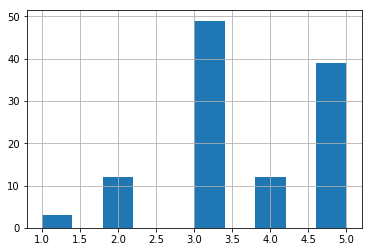




 17 :      稲山聡のような社員を上司はどう扱う
     べきだとあなたは思いますか？
1 - null
2.6 %

2 - 。う思とだきべ
るえ与を由自な当正で中の域領の身自
聡山稲は司上
45.2 %

3 - 。う思とだ明賢がのるせさ長成 らがなし
賛賞しま励を員社なうよの聡山稲は司上
46.1 %

4 - 。う思とだきべ
るえ与を由自な当正で中の域領の身自
、に員社なうよのんさ知佐谷稲は司上
0.9 %

5 - 。いなれさわ煩は司上とうよし動行
うどがら彼、り限るす成達を果結が員社
2.6 %

6 -  。るあが要必るす頼信を司上
にめたるれ入け受を断決な切適は員社
、りあで欠可不はに織組、は度制層階
2.6 %



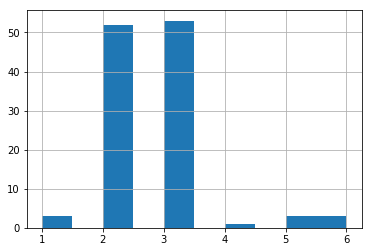




 18 :      あなたがチームのメンバーだったらプレゼンテーシ
     ョンが上手くいくためにどう行動しますか？
1 - User has not answer this question
0.9 %

2 - null
2.6 %

3 - 。う思とだきべる握を権導主
が司上はで況状なうよのこ
14.8 %

4 - 。るす得説にムーチをとこるす期延を議会にめた
る作をンョシーテンゼレプな璧完、が
うろだいなら入に気はトンアイラク
0.9 %

5 - 。るす得説にムーチをとこるす期延を議会にめた
る作をンョシーテンゼレプな璧完
、がうろだいなら入に気はトンアイラク
39.1 %

6 - 。るじ信をとこすく尽を力努の善最がーバンメムーチ
3.5 %

7 - 。う負を任責のけだるきでうよるれわ行
にりうど間時がンョシーテンゼレプ
38.3 %



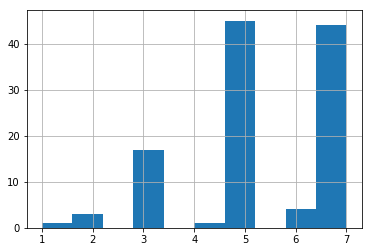




 19 :      このミスは結局だれの責任
     だとあなたは思いますか？
1 - null
2.6 %

2 - 。う思とだ者任責のスミのこくし等が員全ムーチ
51.3 %

3 - 。う思とだ任責の隆田山でのなきべるすを理処の
事来出のてべするこ起で署部が司上
28.7 %

4 - 。う思とだ任責のるかた原榎でのなきべる取
を任責の敗失と功成の身自が員社各
4.3 %

5 - 。う思とだ任責のるかた原老海でのなきべる取
を任責の敗失と功成の身自が員社各
0.9 %

6 - 。う思とだ者任責の敗失のムーチに的終
最、てしとーダーリムーチが聡山稲
12.2 %



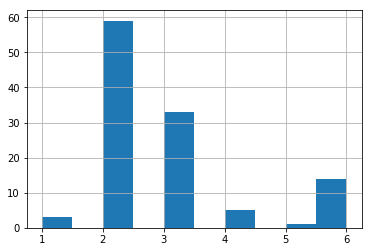




 20 :      山田隆が直面する状況をあ
     なたはどう思いますか？
1 - null
2.6 %

2 - 。う思とだきべるす督監し識認とっも
を力能と点欠の員社、況状いし厳りなか
22.6 %

3 - 。う思とたれらけ避は況状なうよのこ
、ばれいてし督監く深意注とっもをムーチ
43.5 %

4 - 。う思とだ部一の事仕の司上がれそ
、がいし難にから明は況状
19.1 %

5 - 。るいてじ感をスレトスくらそお
、めたいないてし能機がムーチ
、にのるいてし面直にンョシーテンゼレプな要重
12.2 %



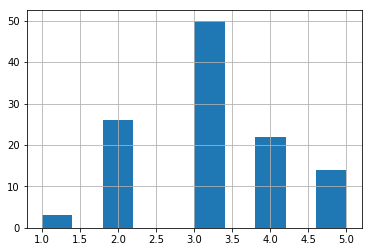




 21 : None


TypeError: '<' not supported between instances of 'str' and 'NoneType'

In [12]:
sjt_n = ''
for j,col in enumerate(df.columns[df.columns.str.startswith('sjt'+sjt_n+'.SJTRoundUserAnswersString.')]):
    n=str.split(col,'sjt'+sjt_n+'.SJTRoundUserAnswersString.')[1]
    print('\n\n\n',j+1,':',df['sjt'+sjt_n+'.SJTRoundUserQuestions.'+n][0])
    df['SJTRoundUserAnswers'+'_num.'+n] = pd.Series(np.zeros(df.shape[0]), index=df.index)
    for i,ans in enumerate(sorted(set(df['sjt'+sjt_n+'.SJTRoundUserAnswersString.'+n]))): # sorted
        if ans is None:
             continue
        if bool(re.match('^[0-9\.\-]+$',ans.strip())):
             continue                   
        df['SJTRoundUserAnswers'+'_num.'+n][df[col]==ans]=i+1
        if re.match('^[a-zA-Z,\._\- 0-9]*$',ans) is not None:
            print(i+1,'-',ans)
        else:
            print(i+1,'-',ans[::-1])
        print(round(len(df[col][df[col]==ans])/len(df[col])*100,1),'%\n')
    if bool(re.match('^[0-9\.\-]+$',ans.strip())):
        pd.to_numeric(df['sjt'+sjt_n+'.SJTRoundUserAnswersString.'+n]).hist()    
    else:
        df['SJTRoundUserAnswers'+'_num.'+n].hist()
    plt.show()

In [ ]:
sjt_n = '2'
for col in df.columns[df.columns.str.startswith('sjt'+sjt_n+'.SJTRoundUserAnswers.')]:
    print(col)
    n=str.split(col,'sjt'+sjt_n+'.SJTRoundUserAnswers.')[1]
    print(df['sjt'+sjt_n+'.SJTRoundUserQuestions.'+n][0])
    #print(set(df['sjt2.SJTRoundUserAnswers.'+n]))
    for c in set(df['sjt'+sjt_n+'.SJTRoundUserAnswers.'+n]):
        if c is None:
             continue
        elif np.isnan(c):
            continue
        c_text = df['sjt'+sjt_n+'.SJTRoundUserAnswersString.'+n][df['sjt'+sjt_n+'.SJTRoundUserAnswers.'+n]==c][0]
        if re.match('^[a-zA-Z,._\- 0-9]*$',c_text) is not None:
            print(c_text)
        else:
            print(c,'-',c_text[::-1])#,':',round(sum(df['sjt2.SJTRoundUserAnswers.0']==c)/df.shape[0]*100),'%')
    df[col].hist()
    plt.show()